# Import all necessary packages

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,log_loss,accuracy_score,confusion_matrix,roc_curve,auc, precision_score,classification_report,roc_auc_score,cohen_kappa_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
warnings.simplefilter("ignore")
from scipy import stats
from scipy.stats import chi2_contingency
import researchpy as rp
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import copy
import math
import time
from scipy import stats
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stools
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [395]:
df=pd.read_csv("D:/DS Training Videos/ML algo script/2.Logistic Regression/pychurn.csv",sep=',')

In [396]:
print("Shape of dataframe:",df.shape)

Shape of dataframe: (1840, 19)


In [397]:
df.describe()

,Unnamed: 0,account.length,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,920.500000,99.652717,8.540761,180.179402,100.269565,30.631027,200.407065,100.209239,17.034793,200.219022,100.450543,9.009918,10.208043,4.499457,2.756707,1.542935
std,531.306566,39.937792,14.007901,54.049201,19.999379,9.188340,51.226070,19.827786,4.354181,51.376336,19.565585,2.311955,2.797393,2.501549,0.755324,1.304739
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.200000,12.000000,2.650000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,460.750000,73.000000,0.000000,145.000000,87.000000,24.650000,165.900000,87.000000,14.100000,166.975000,87.000000,7.517500,8.400000,3.000000,2.270000,1.000000
50%,920.500000,98.500000,0.000000,180.800000,100.500000,30.735000,202.250000,101.000000,17.195000,200.650000,101.000000,9.030000,10.200000,4.000000,2.750000,1.000000
75%,1380.250000,127.000000,21.250000,216.800000,113.000000,36.860000,234.550000,114.000000,19.935000,236.425000,114.000000,10.640000,12.000000,6.000000,3.240000,2.000000
max,1840.000000,243.000000,51.000000,350.800000,165.000000,59.640000,351.600000,168.000000,29.890000,381.900000,175.000000,17.190000,20.000000,19.000000,5.400000,9.000000


In [398]:
df['churn'].value_counts()

 False.    1603
 True.      237
Name: churn, dtype: int64

In [399]:
df.dtypes

Unnamed: 0                         int64
account.length                     int64
international.plan                object
voice.mail.plan                   object
number.vmail.messages              int64
total.day.minutes                float64
total.day.calls                    int64
total.day.charge                 float64
total.eve.minutes                float64
total.eve.calls                    int64
total.eve.charge                 float64
total.night.minutes              float64
total.night.calls                  int64
total.night.charge               float64
total.intl.minutes               float64
total.intl.calls                   int64
total.intl.charge                float64
number.customer.service.calls      int64
churn                             object
dtype: object

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 19 columns):
Unnamed: 0                       1840 non-null int64
account.length                   1840 non-null int64
international.plan               1840 non-null object
voice.mail.plan                  1840 non-null object
number.vmail.messages            1840 non-null int64
total.day.minutes                1840 non-null float64
total.day.calls                  1840 non-null int64
total.day.charge                 1840 non-null float64
total.eve.minutes                1840 non-null float64
total.eve.calls                  1840 non-null int64
total.eve.charge                 1840 non-null float64
total.night.minutes              1840 non-null float64
total.night.calls                1840 non-null int64
total.night.charge               1840 non-null float64
total.intl.minutes               1840 non-null float64
total.intl.calls                 1840 non-null int64
total.intl.charge            

In [401]:
rp.summary_cat(df[["international.plan", "voice.mail.plan"]])

,Variable,Outcome,Count,Percent
0,international.plan,no,1660,90.22
1,,yes,180,9.78
2,voice.mail.plan,no,1310,71.20
3,,yes,530,28.80


# Label encoding to convert string to numeric

In [402]:
df2=df.select_dtypes(include=[object])
le=preprocessing.LabelEncoder()
df2=df2.apply(le.fit_transform)
df2.head(10)

,international.plan,voice.mail.plan,churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,1,0
7,1,0,0
8,0,0,0
9,1,1,0


Dataframe is loaded with numeric value for categorical variables

In [403]:
for col in df2.columns:
    df[col]=df2[col]

# Histogram

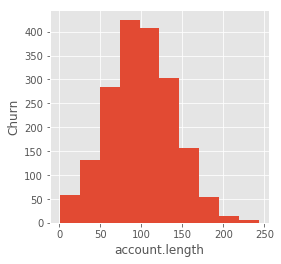

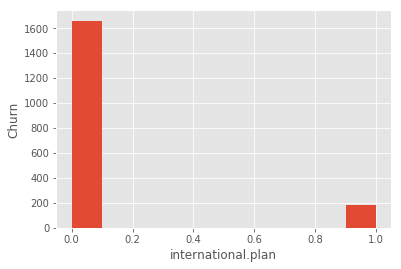

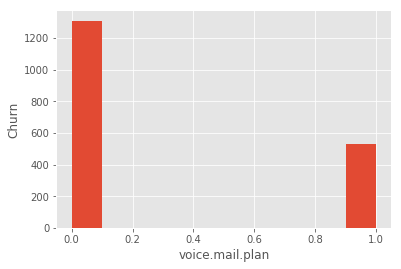

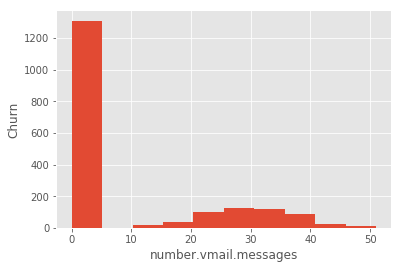

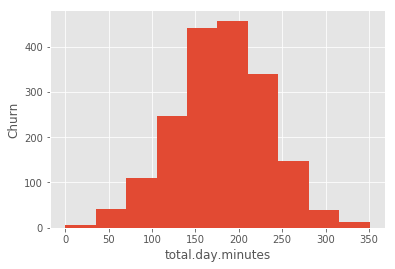

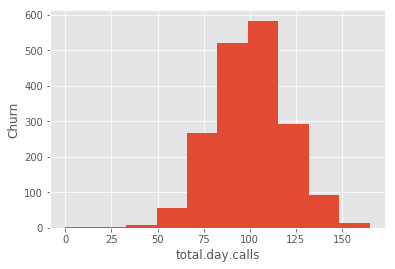

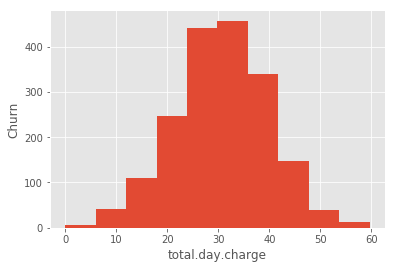

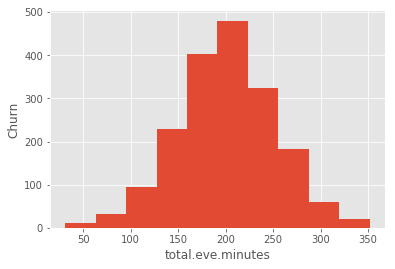

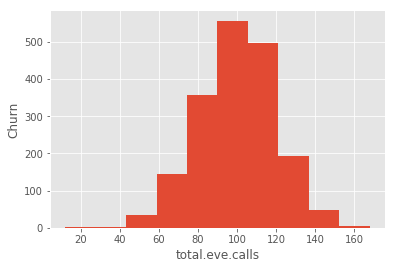

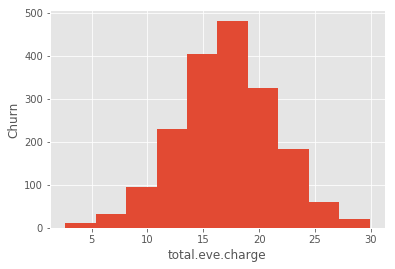

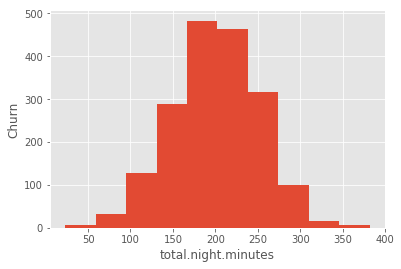

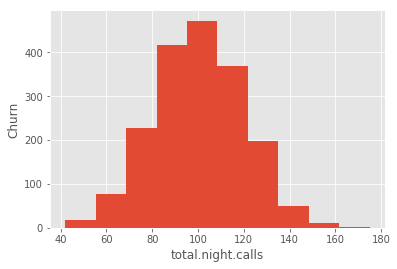

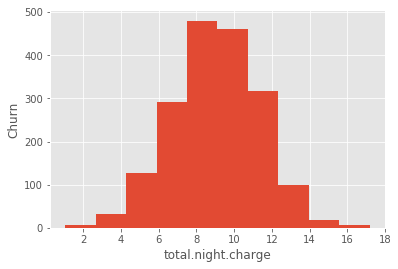

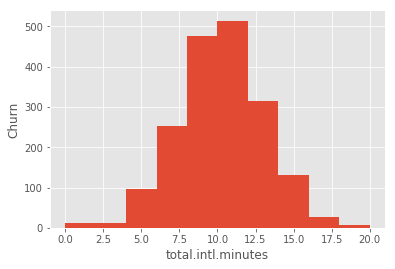

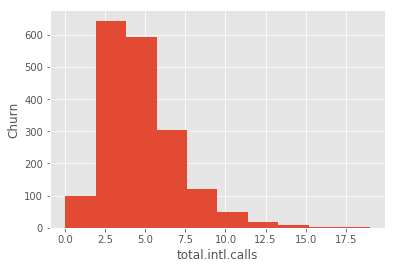

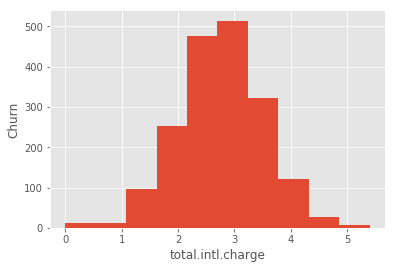

ValueError: num must be 1 <= num <= 16, not 17

In [404]:
##histogram
plt.style.use('ggplot')  
fig = plt.figure(figsize = (18, 18))
for index, feature_name in enumerate(df.columns[1:]): 
    ax = fig.add_subplot(4, 4, index + 1) 
    plt.hist(df[feature_name])
    plt.ylabel('Churn', size = 12) 
    plt.xlabel(feature_name, size = 12) 
    plt.show() 

Conclusion:total.int.calls and total.vmail.message is not normally distributed

# Boxplot

In [ ]:
#Boxplot
plt.style.use('ggplot')  
fig = plt.figure(figsize = (18, 18))
for index, feature_name in enumerate(df.columns[1:]): 
    ax = fig.add_subplot(4, 4, index + 1) 
    plt.boxplot(df[feature_name])
    plt.xlabel(feature_name, size = 12) 
    plt.show() 

# Correlation between numeric and numeric variables

Correlation plot

In [405]:
##Correlation heatmap
hcorr =df.corr()
hcorr=hcorr.loc[['account.length','number.vmail.messages','total.day.minutes','total.day.calls','total.day.charge','total.eve.minutes','total.eve.calls','total.eve.charge','total.night.minutes','total.night.calls','total.night.charge','total.intl.minutes','total.intl.calls','total.intl.charge','number.customer.service.calls'],['account.length','number.vmail.messages','total.day.minutes','total.day.calls','total.day.charge','total.eve.minutes','total.eve.calls','total.eve.charge','total.night.minutes','total.night.calls','total.night.charge','total.intl.minutes','total.intl.calls','total.intl.charge','number.customer.service.calls']]
#hcorr[hcorr>0.8]
hcorr

,account.length,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls
account.length,1.000000,-0.035813,0.002112,0.027877,0.002106,-0.032427,0.030259,-0.032405,-0.008582,-0.003885,-0.008581,0.016877,0.021495,0.017017,0.017760
number.vmail.messages,-0.035813,1.000000,0.026884,0.010543,0.026886,0.009116,0.006560,0.009135,0.005867,0.000497,0.005847,0.025758,0.015317,0.025820,0.007580
total.day.minutes,0.002112,0.026884,1.000000,0.010301,1.000000,0.001721,0.066844,0.001720,-0.034651,0.039007,-0.034665,-0.019352,0.023877,-0.019329,-0.027535
total.day.calls,0.027877,0.010543,0.010301,1.000000,0.010292,0.004635,-0.003779,0.004644,0.005767,-0.014079,0.005764,0.035633,0.003231,0.035811,-0.037516
total.day.charge,0.002106,0.026886,1.000000,0.010292,1.000000,0.001732,0.066839,0.001731,-0.034646,0.039011,-0.034660,-0.019351,0.023877,-0.019329,-0.027541
total.eve.minutes,-0.032427,0.009116,0.001721,0.004635,0.001732,1.000000,-0.002282,1.000000,-0.003585,0.014797,-0.003566,-0.027039,0.026341,-0.026924,-0.013357
total.eve.calls,0.030259,0.006560,0.066844,-0.003779,0.066839,-0.002282,1.000000,-0.002284,-0.016845,0.020336,-0.016791,-0.009613,0.002211,-0.009597,0.003783
total.eve.charge,-0.032405,0.009135,0.001720,0.004644,0.001731,1.000000,-0.002284,1.000000,-0.003595,0.014824,-0.003576,-0.027070,0.026338,-0.026955,-0.013370
total.night.minutes,-0.008582,0.005867,-0.034651,0.005767,-0.034646,-0.003585,-0.016845,-0.003595,1.000000,0.001385,0.999999,-0.024864,-0.001159,-0.024892,-0.014547
total.night.calls,-0.003885,0.000497,0.039007,-0.014079,0.039011,0.014797,0.020336,0.014824,0.001385,1.000000,0.001360,0.015283,0.001610,0.015203,0.003065


Highly correlated

       Conclusion:
       1.total.night.charge~total.night.minutes
       2.total.intl.minutes~total.intl.charge


# Correlation between categorical and categorical variables

#    Chisq-test

In [406]:
def chisq_test(a,b):
    crosstab, test_results, expected = rp.crosstab(a, b,
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    return test_results

In [407]:

test_results=chisq_test(df["international.plan"], df["voice.mail.plan"])
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.1391
1,p-value =,0.7092
2,Cramer's phi =,0.0087


In [408]:
test_results= chisq_test(df["international.plan"], df["churn"])
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,125.4652
1,p-value =,0.0000
2,Cramer's phi =,0.2611


In [409]:
test_results = chisq_test(df["voice.mail.plan"], df["churn"])
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,15.0768
1,p-value =,0.0001
2,Cramer's phi =,0.0905


Conclusion :No correlation within  independent categorical variables and high correlation with dependent variable

# Correlation between categorical and numeric variables

    1.t-test
    2.ANOVA test
    3.Corr plot

In [410]:
hcorr =df.corr()
hcorr=hcorr.loc[['account.length','number.vmail.messages','total.day.minutes','total.day.calls','total.day.charge','total.eve.minutes','total.eve.calls','total.eve.charge','total.night.minutes','total.night.calls','total.night.charge','total.intl.minutes','total.intl.calls','total.intl.charge','number.customer.service.calls'],['international.plan','voice.mail.plan','churn']]
hcorr[hcorr>0.8]
#hcorr

,international.plan,voice.mail.plan,churn
account.length,NaN,NaN,NaN
number.vmail.messages,NaN,0.958825,NaN
total.day.minutes,NaN,NaN,NaN
total.day.calls,NaN,NaN,NaN
total.day.charge,NaN,NaN,NaN
total.eve.minutes,NaN,NaN,NaN
total.eve.calls,NaN,NaN,NaN
total.eve.charge,NaN,NaN,NaN
total.night.minutes,NaN,NaN,NaN
total.night.calls,NaN,NaN,NaN


        Conclusion:
        Highly correlated
        1.number.vmail.messages~voice.mail.plan

# T-Test

In [411]:
x=df.loc[:,['account.length','number.vmail.messages','total.day.minutes','total.day.calls','total.day.charge','total.eve.minutes','total.eve.calls','total.eve.charge','total.night.minutes','total.night.calls','total.night.charge','total.intl.minutes','total.intl.calls','total.intl.charge','number.customer.service.calls']]
for i,c in enumerate(x.columns):
    t, p = stats.ttest_ind(df[c],df["international.plan"])    
    print("T-Value:",t)
    print("p-value:",p)
for i,c in enumerate(x.columns):
    t, p = stats.ttest_ind(df[c],df["voice.mail.plan"])    
    print("T-Value:",t)
    print("p-value:",p)

T-Value: 106.92406002258804
p-value: 0.0
T-Value: 25.848276407425498
p-value: 1.6350360725129495e-135
T-Value: 142.91649458745152
p-value: 0.0
T-Value: 214.8274071200523
p-value: 0.0
T-Value: 142.46796059137435
p-value: 0.0
T-Value: 167.7303079132263
p-value: 0.0
T-Value: 216.555651587568
p-value: 0.0
T-Value: 166.46732436549834
p-value: 0.0
T-Value: 167.0827457990708
p-value: 0.0
T-Value: 219.98603973174454
p-value: 0.0
T-Value: 164.00274055387743
p-value: 0.0
T-Value: 154.16271357240288
p-value: 0.0
T-Value: 74.94983018073611
p-value: 0.0
T-Value: 140.5157428900423
p-value: 0.0
T-Value: 46.32383018827465
p-value: 0.0
T-Value: 106.71585279788616
p-value: 0.0
T-Value: 25.258402398256347
p-value: 6.042102441133649e-130
T-Value: 142.76267824712087
p-value: 0.0
T-Value: 214.3881532806361
p-value: 0.0
T-Value: 141.48260529832032
p-value: 0.0
T-Value: 167.56729640057733
p-value: 0.0
T-Value: 216.11206778061182
p-value: 0.0
T-Value: 164.0950375974507
p-value: 0.0
T-Value: 166.92023625609045


# One-way ANOVA Test

In [412]:
def oneway_anova(a):
    F, p = stats.f_oneway(df[a==0],df[a==1])
    return (F,p)   

In [413]:
F, p = oneway_anova(df['international.plan'])
print(p)
print(df.columns)

[7.26408978e-01 1.06084682e-01 0.00000000e+00 7.09375700e-01
 5.69144162e-01 6.66484212e-03 3.53519652e-01 6.66610591e-03
 1.21981045e-01 4.18832012e-01 1.21852925e-01 2.19857173e-01
 1.11435195e-01 2.19590124e-01 6.55074769e-02 1.16081018e-01
 6.60252001e-02 9.39055652e-01 4.59793333e-30]
Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls', 'churn'],
      dtype='object')


In [414]:
F, p = oneway_anova(df['voice.mail.plan'])
print(p)
print(df.columns)

[4.60116144e-01 2.28249718e-01 7.09375723e-01 0.00000000e+00
 0.00000000e+00 4.25967872e-01 5.08202707e-01 4.25915414e-01
 5.47437977e-01 8.59706598e-01 5.46909650e-01 8.82456930e-01
 7.41914169e-01 8.83505427e-01 2.74159800e-01 7.84586375e-01
 2.72459259e-01 9.29459184e-01 1.00979790e-04]
Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls', 'churn'],
      dtype='object')


In [415]:
F, p = oneway_anova(df['churn'])
print(p)
print(df.columns)

[9.82085144e-01 9.99574757e-01 4.59793334e-30 1.00979789e-04
 5.86221431e-04 4.05315604e-13 4.78175316e-01 4.05635048e-13
 6.65579342e-04 3.49890750e-01 6.67283891e-04 1.23655674e-01
 7.87596875e-01 1.23378662e-01 7.85410637e-03 4.30091656e-01
 7.73607716e-03 8.37182258e-19 0.00000000e+00]
Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls', 'churn'],
      dtype='object')


In [416]:
x=df.drop(['Unnamed: 0','churn'],axis=1)
y=df['churn']

# Model Fitting

In [417]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

# Slope & Intercept

In [418]:
# slope
print("Slope:")
print(log_reg.coef_)
# slope
print("Intercept:")
print(log_reg.intercept_)

Slope:
[[-1.50454493e-03  3.33930743e-01 -2.43063571e-02 -2.77060071e-02
   5.18815235e-03 -1.02244410e-02  8.72632641e-04  1.00232445e-03
  -5.79739707e-03  1.69229957e-04 -1.66454605e-03 -1.75781967e-02
   1.99157808e-04  2.99473159e-02 -3.09984541e-02  8.31808965e-03
   4.49907445e-01]]
Intercept:
[-0.06244716]


# Model class prediction

In [419]:
def probability_prediction(test,threshold):
       return np.where(log_reg.predict_proba(test)[:,1] > threshold, 1, 0)

In [420]:
y_pred=probability_prediction(x_test,0.5)
print("Predicted class:")
y_pred

Predicted class:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# LogLoss 

In [421]:
def logloss(test,prob,pred):
    return(log_loss(test,prob),accuracy_score(test,pred.astype(int)),confusion_matrix(test,pred))

In [422]:
logloss,accuracyscore,confusionmatrix=logloss(y_test,log_reg.predict_proba(x_test)[:,1],y_pred)
print("Logloss:",logloss)
print("Accuracyscore:",accuracyscore)
print("Confusion matrix:")
print(confusionmatrix)

Logloss: 0.3227624599943916
Accuracyscore: 0.875
Confusion matrix:
[[480   5]
 [ 64   3]]


In [423]:
y_test.value_counts()

0    485
1     67
Name: churn, dtype: int64

# Confusion Matrix

In [424]:
# Sensitivity
def confusion__matrix(confusion):
    TP=confusion[1,1]
    TN=confusion[0,0]
    FP=confusion[0,1]
    FN=confusion[1,0]
    Accuracy= (TP+TN)/(TP+TN+FP+FN)
    Recall= TP/(TP+FN) # When the actual value is +ve, how often is the prediction correct ? 
    Specificity= TN/ float(TN+FP) # When the actual value is -ve, how often is the prediction correct ?  Specificity
    Precision= TP/(TP+FP)   # when a postive value is predicted, how often is the prediction correct ?
    return(Accuracy,Recall,Specificity,Precision)

In [425]:
Accuracy,Recall,Specificity,Precision=confusion__matrix(confusionmatrix)
print("Accuracy:",Accuracy)
print("Recall:",Recall)
print("Specificity:",Specificity)
print("Precision:",Precision)

Accuracy: 0.875
Recall: 0.04477611940298507
Specificity: 0.9896907216494846
Precision: 0.375


Conclusion:There is an imbalanced dataset as 1 is less than 0.So we have to use SMOTE to balance the dataset

# Classification report to analyse Precision and Recall

In [426]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       485
           1       0.38      0.04      0.08        67

    accuracy                           0.88       552
   macro avg       0.63      0.52      0.51       552
weighted avg       0.82      0.88      0.83       552



Conclusion:Precision & recall for 1 is low due to imbalanced dataset

# K-Fold Cross Validation

In [427]:
def kfoldcrossvalidation(model,a,b):
    k_fold = KFold(n_splits=5)
    accuracyscore =cross_val_score(model,a,b,cv=k_fold,n_jobs=-1)
    rocauccurve= cross_val_score(model,a,b,cv=5, scoring='roc_auc')
    return(accuracyscore,rocauccurve)

In [428]:
AccuracyScore,RocAucCurve=kfoldcrossvalidation(log_reg,x,y)
print("AccuracyScore:",AccuracyScore)
print("Std of AccuracyScore:",np.std(AccuracyScore))
print("Mean of AccuracyScore:",np.mean(AccuracyScore))
print("RocCurveScore:",RocAucCurve)
print("Std of RocAucCurve",np.std(RocAucCurve))
print("Mean of RocAucCurve",np.mean(RocAucCurve))

AccuracyScore: [0.86413043 0.875      0.88043478 0.85869565 0.86413043]
Std of AccuracyScore: 0.00798746655255385
Mean of AccuracyScore: 0.8684782608695653
RocCurveScore: [0.68648505 0.72088553 0.73003248 0.7078125  0.68320312]
Std of RocAucCurve 0.01845239676727036
Mean of RocAucCurve 0.7056837374478028


# Check for overfitting and underfitting

In [429]:
logit_score_train = log_reg.score(x_train,y_train)
print ('Model Score on Training data set', logit_score_train)
logit_score_test = log_reg.score(x_test,y_test)
print ('Model Score on Training data set', logit_score_test)

Model Score on Training data set 0.8656832298136646
Model Score on Training data set 0.875


Conclusion:Slight underfitting

In [430]:
logit_auc_train = roc_auc_score(y_train,log_reg.predict(x_train))
logit_auc_test = roc_auc_score(y_test,log_reg.predict(x_test))
print ('Auc on  Training data set', ',',logit_auc_train)
print ('Auc on  Test data set', logit_auc_test)

Auc on  Training data set , 0.5086341155424602
Auc on  Test data set 0.5172334205262348


# ROC-AUC Visualisation

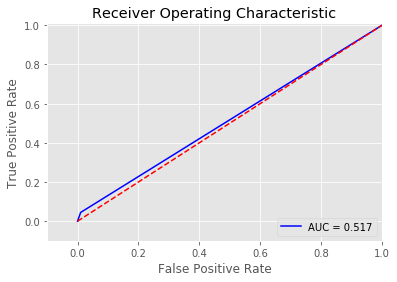

In [431]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict(x_test))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RFE

In [432]:
from sklearn.feature_selection import RFE
rfe = RFE(log_reg,8)
r1 = rfe.fit(x,y)
print (r1)
print(r1.support_)
print(r1.ranking_)
print(r1.n_features_)
#print("Num Features: %d") % r1.n_features_
#print("Selected Features: ") % r1.support_
#print("Feature Ranking: %s") % r1.ranking_

RFE(estimator=LogisticRegression(), n_features_to_select=8)
[False  True  True  True False  True False False False False False  True
 False  True  True False  True]
[ 4  1  1  1  3  1  7  5  2 10  8  1  9  1  1  6  1]
8


In [433]:
df2=pd.DataFrame()
for col in df.columns:
    col2=col
    col2=col2.replace('.','')
    df2[col2]=df[col]
    #print(col2,col)
df2.head(10)

,Unnamed: 0,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,churn
0,1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,3,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,4,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,5,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,6,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,7,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,8,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,9,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,10,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [434]:
glm = smf.logit(formula = "churn~accountlength+internationalplan+voicemailplan+numbervmailmessages+totaldayminutes+totaldaycalls+totaldaycharge+totaleveminutes+totalevecalls+totalevecharge+totalnightminutes+totalnightcalls+totalnightcharge+totalintlminutes+totalintlcalls+totalintlcharge+numbercustomerservicecalls", data = df2).fit()
y, X = dmatrices("churn~accountlength+internationalplan+voicemailplan+numbervmailmessages+totaldayminutes+totaldaycalls+totaldaycharge+totaleveminutes+totalevecalls+totalevecharge+totalnightminutes+totalnightcalls+totalnightcharge+totalintlminutes+totalintlcalls+totalintlcharge+numbercustomerservicecalls", data = df2, return_type = "dataframe")

Optimization terminated successfully.
         Current function value: 0.307315
         Iterations 8


In [435]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 1840
Model:                          Logit   Df Residuals:                     1822
Method:                           MLE   Df Model:                           17
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                  0.1999
Time:                        15:17:34   Log-Likelihood:                -565.46
converged:                       True   LL-Null:                       -706.76
                                        LLR p-value:                 4.342e-50
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -7.3757      0.987     -7.473      0.000      -9.310      -5.441
accountlength                 -0.0015      0.002     -0.770      0.441      -0.005       0.002
internationalplan              1.9658      0.196     10.031      0.000       1.582       2.350
voicemailplan                 -1.7391      0.776     -2.241      0.025      -3.260      -0.218
numbervmailmessages            0.0267      0.024      1.106      0.269      -0.021       0.074
totaldayminutes                0.9327      4.602      0.203      0.839      -8.087       9.953
totaldaycalls                 -0.0008      0.004     -0.195      0.845      -0.008       0.007
totaldaycharge                -5.4204     27.072     -0.200      0.841     -58.480      47.639
totaleveminutes                2.3178      2.333      0.994      0.320      -2.255       6.890
totalevecalls                  0.0019      0.004      0.482      0.630      -0.006       0.010
totalevecharge               -27.1973     27.445     -0.991      0.322     -80.989      26.595
totalnightminutes             -0.9645      1.225     -0.787      0.431      -3.366       1.437
totalnightcalls               -0.0036      0.004     -0.890      0.373      -0.011       0.004
totalnightcharge              21.5199     27.226      0.790      0.429     -31.842      74.882
totalintlminutes             -13.1027      7.478     -1.752      0.080     -27.759       1.553
totalintlcalls                -0.0674      0.033     -2.015      0.044      -0.133      -0.002
totalintlcharge               48.8524     27.691      1.764      0.078      -5.422     103.127
numbercustomerservicecalls     0.5151      0.055      9.365      0.000       0.407       0.623
==============================================================================================
"""

In [436]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print (vif)
print(len(vif))
print(X.columns)
print(len(X.columns))

[140.2931535652043, 1.0100164338372306, 1.0139062481619492, 12.473352775140556, 12.478294025583068, 10547680.355191493, 1.0078804374142105, 10547675.130456077, 2355908.3261331352, 1.0086341475622704, 2355910.53339059, 664451.4652789739, 1.0073223564309344, 664450.6314709764, 69214.71285571596, 1.0088582676216742, 69216.29204823499, 1.0047273435415585]
18
Index(['Intercept', 'accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')
18


Conclusion:Vif for voicemailplan,numbervmailmessages,totaldayminutes,totaldaycharge,totaleveminutes,totalevecharge,totalnightminutes,totalnightcharge,totalintlminutes,totalintlcharge are more than 10

# We have to perform SMOTE as the data is imbalanced and follow the same steps to fit model which is done before SMOTE

# Perform SMOTE

In [474]:
X_resample, y_resample = SMOTE().fit_sample(x, y)
print(df['churn'].value_counts())
print ('The number of transactions after resampling : ' + str(len(X_resample)))
#print ('If the number of Churners is equal to the number of normal tansactions? ' + str(sum(y_resample == 0) == sum(y_resample == 1)))

0    1603
1     237
Name: churn, dtype: int64
The number of transactions after resampling : 3206


In [475]:
X_resample.columns

Index(['account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls'],
      dtype='object')

In [476]:
##Remove totaldayminutes,totaldaycharge,totaleveminutes,totalevecharge,totalnightminutes,totalnightcharge,totalintlminutes,totalintlcharge
#X_resample=X_resample.loc[:,['account.length','international.plan','total.day.calls','total.eve.calls','total.night.calls','total.intl.calls','number.customer.service.calls']]
X_resample=X_resample.loc[:,['account.length','international.plan', 'voice.mail.plan',
                             'number.vmail.messages','total.day.calls',
                             'total.eve.calls','total.night.calls','total.intl.calls','number.customer.service.calls']]

In [477]:
yy= pd.DataFrame(y_resample)
yy['churn'].value_counts()

1.0    1603
0.0    1603
Name: churn, dtype: int64

# Histogram after SMOTE

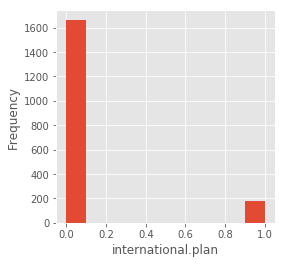

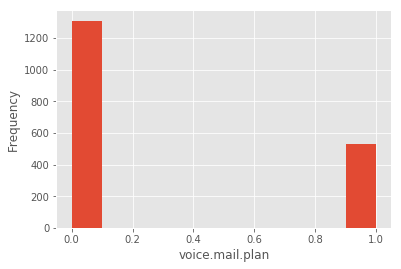

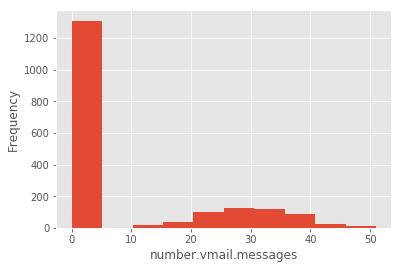

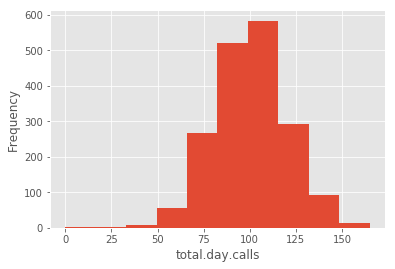

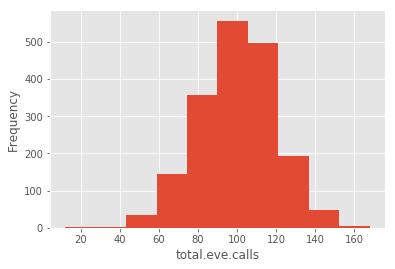

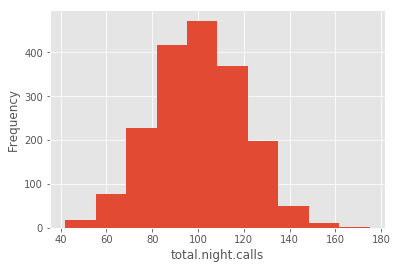

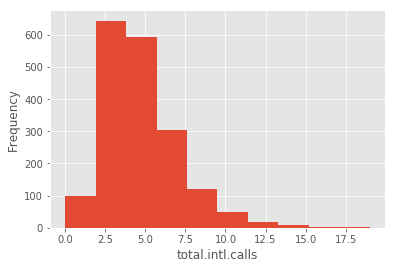

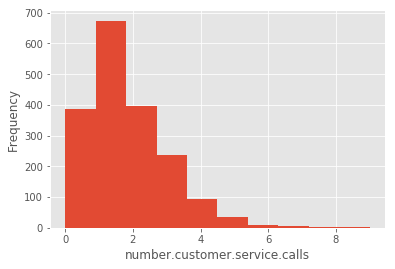

In [478]:
##histogram
plt.style.use('ggplot')  
fig = plt.figure(figsize = (18, 18))
for index, feature_name in enumerate(X_resample.columns[1:]): 
    ax = fig.add_subplot(4, 4, index + 1) 
    plt.hist(df[feature_name])
    plt.ylabel('Frequency', size = 12) 
    plt.xlabel(feature_name, size = 12) 
    plt.show() 

    Conclusion:
        Not normally distributed
        1.number.vmail.messages (bad)
        2.totl.intl.calls(ok)
        3.number.customer.service.calls(ok)

# Boxplot after SMOTE

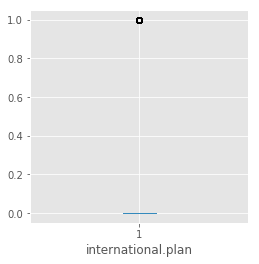

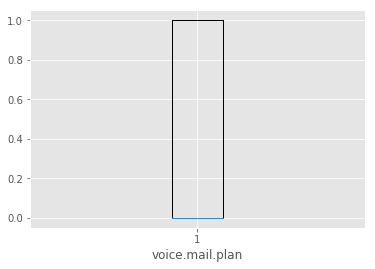

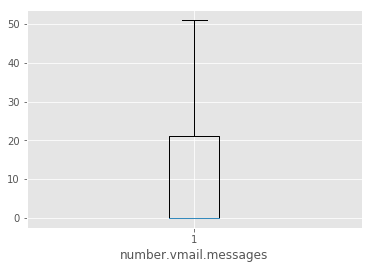

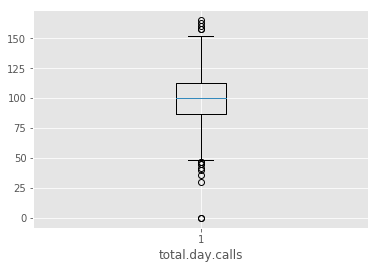

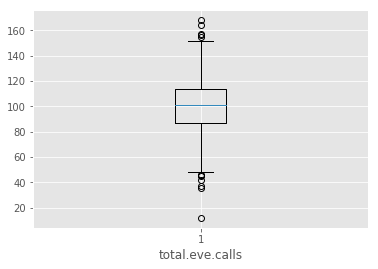

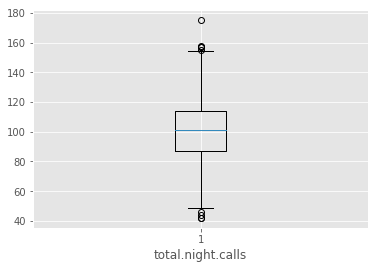

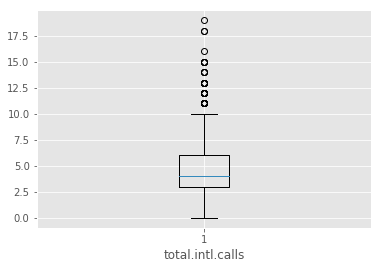

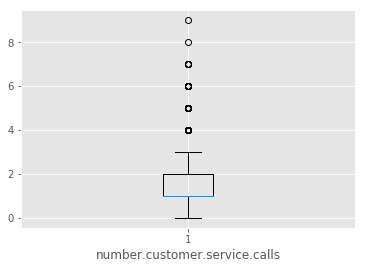

In [479]:
#Boxplot
plt.style.use('ggplot')  
fig = plt.figure(figsize = (18, 18))
for index, feature_name in enumerate(X_resample.columns[1:]): 
    ax = fig.add_subplot(4, 4, index + 1) 
    plt.boxplot(df[feature_name])
    plt.xlabel(feature_name, size = 12) 
    plt.show() 

# Correlation between numeric and numeric variables after SMOTE

In [480]:
##Correlation heatmap
df_smote=pd.DataFrame()
df_smote=X_resample
df_smote['churn']=y_resample
hcorr =df_smote.corr()
hcorr=hcorr.loc[['account.length','number.vmail.messages','total.day.minutes','total.day.calls','total.day.charge','total.eve.minutes','total.eve.calls','total.eve.charge','total.night.minutes','total.night.calls','total.night.charge','total.intl.minutes','total.intl.calls','total.intl.charge','number.customer.service.calls'],['account.length','number.vmail.messages','total.day.minutes','total.day.calls','total.day.charge','total.eve.minutes','total.eve.calls','total.eve.charge','total.night.minutes','total.night.calls','total.night.charge','total.intl.minutes','total.intl.calls','total.intl.charge','number.customer.service.calls']]
hcorr[hcorr>0.8]
#hcorr

,account.length,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls
account.length,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number.vmail.messages,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total.day.minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total.day.calls,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total.day.charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total.eve.minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total.eve.calls,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total.eve.charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total.night.minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total.night.calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


    Conclusion:
            Highly correlated
            1.total.night.charge~total.night.minutes
            2.total.intl.charge~total.intl.minutes

# Correlation between categorical and categorical variables after SMOTE

# CHISQ-TEST

In [481]:
test_results=chisq_test(df_smote["international.plan"], df_smote["voice.mail.plan"])
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,2.1272
1,p-value =,0.1447
2,Cramer's phi =,0.0258


In [482]:
test_results=chisq_test(df_smote["international.plan"], df_smote["churn"])
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,33.1244
1,p-value =,0.0000
2,Cramer's phi =,0.1016


In [483]:
test_results=chisq_test(df_smote["voice.mail.plan"], df_smote["churn"])
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,261.0749
1,p-value =,0.0000
2,Cramer's phi =,0.2854


    Conclusion:
        No correlation between independent variables and high correlation between churn and dependent variables

# Correlation between categorical and numeric variables

    1.t-test
    2.ANOVA test
    3.Corr plot

In [484]:
hcorr =df_smote.corr()
hcorr=hcorr.loc[['account.length','number.vmail.messages','total.day.minutes','total.day.calls','total.day.charge','total.eve.minutes','total.eve.calls','total.eve.charge','total.night.minutes','total.night.calls','total.night.charge','total.intl.minutes','total.intl.calls','total.intl.charge','number.customer.service.calls'],['international.plan','voice.mail.plan','churn']]
hcorr[hcorr>0.8]

,international.plan,voice.mail.plan,churn
account.length,NaN,NaN,NaN
number.vmail.messages,NaN,0.88624,NaN
total.day.minutes,NaN,NaN,NaN
total.day.calls,NaN,NaN,NaN
total.day.charge,NaN,NaN,NaN
total.eve.minutes,NaN,NaN,NaN
total.eve.calls,NaN,NaN,NaN
total.eve.charge,NaN,NaN,NaN
total.night.minutes,NaN,NaN,NaN
total.night.calls,NaN,NaN,NaN


    Conclusion
        High correlation
        1.voice.mail.plan~number.vmail.messages

# One way ANOVA Test after SMOTE

In [485]:
F, p = oneway_anova(df_smote['international.plan'])
print(p)
print(df.columns)

[7.26408978e-01 1.06084682e-01 0.00000000e+00 7.09375700e-01
 5.69144162e-01 6.66484212e-03 3.53519652e-01 6.66610591e-03
 1.21981045e-01 4.18832012e-01 1.21852925e-01 2.19857173e-01
 1.11435195e-01 2.19590124e-01 6.55074769e-02 1.16081018e-01
 6.60252001e-02 9.39055652e-01 4.59793333e-30]
Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls', 'churn'],
      dtype='object')


In [486]:
F, p = oneway_anova(df_smote['voice.mail.plan'])
print(p)
print(df.columns)

[4.60116144e-01 2.28249718e-01 7.09375723e-01 0.00000000e+00
 0.00000000e+00 4.25967872e-01 5.08202707e-01 4.25915414e-01
 5.47437977e-01 8.59706598e-01 5.46909650e-01 8.82456930e-01
 7.41914169e-01 8.83505427e-01 2.74159800e-01 7.84586375e-01
 2.72459259e-01 9.29459184e-01 1.00979790e-04]
Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls', 'churn'],
      dtype='object')


In [487]:
F, p = oneway_anova(df['churn'])
print(p)
print(df.columns)

[9.82085144e-01 9.99574757e-01 4.59793334e-30 1.00979789e-04
 5.86221431e-04 4.05315604e-13 4.78175316e-01 4.05635048e-13
 6.65579342e-04 3.49890750e-01 6.67283891e-04 1.23655674e-01
 7.87596875e-01 1.23378662e-01 7.85410637e-03 4.30091656e-01
 7.73607716e-03 8.37182258e-19 0.00000000e+00]
Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls', 'churn'],
      dtype='object')


    Conclusion
        High correlation
        1.voice.mail.plan~number.vmail.messages

# Model Fit after SMOTE

In [488]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [489]:
# slope
print("Slope:")
print(log.coef_)
# slope
print("Intercept:")
print(log.intercept_)

Slope:
[[-3.73349576e-03  2.65568457e-02 -6.74876383e-01  5.17326137e-03
  -1.24015613e-02 -8.70231817e-03 -1.10314117e-02 -1.15745025e-01
   1.36919576e-01  9.64675215e+00]]
Intercept:
[-0.89328723]


In [490]:
def probability_prediction_SMOTE(test,threshold):
       return np.where(log.predict_proba(test)[:,1] > threshold, 1, 0)

In [491]:
ysmot_pred=probability_prediction_SMOTE(X_test,0.5)
print("Predicted class:")
ysmot_pred

Predicted class:


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

# Check for Overfit/UnderFit

In [492]:
logit_score_train = log.score(X_train,Y_train)
print ('Model Score on Training data set', logit_score_train)
logit_score_test = log.score(X_test,Y_test)
print ('Model Score on Testing data set', logit_score_test)

logit_auc_train = roc_auc_score(Y_train,log.predict(X_train))
logit_auc_test = roc_auc_score(Y_test,log.predict(X_test))
print ('Auc on  Training data set',logit_auc_train)
print ('Auc on  Test data set', logit_auc_test)

Model Score on Training data set 1.0
Model Score on Testing data set 1.0
Auc on  Training data set 1.0
Auc on  Test data set 1.0


# Log Loss after smote

In [493]:
loss_smote=log_loss(Y_test,log.predict_log_proba(X_test)[:,1])
print("Log loss:",loss_smote)
print("Accuracy score:",accuracy_score(Y_test,log.predict_log_proba(X_test)[:,1].astype(int)))
confusion_smote = confusion_matrix(Y_test,ysmot_pred)
print("Confusion matrix:")
print(confusion_smote)

Log loss: 17.215589480329314
Accuracy score: 0.0
Confusion matrix:
[[322   0]
 [  0 320]]


In [494]:
Accuracy,Recall,Specificity,Precision=confusion__matrix(confusion_smote)
print("Accuracy:",Accuracy)
print("Recall:",Recall)
print("Specificity:",Specificity)
print("Precision:",Precision)

Accuracy: 1.0
Recall: 1.0
Specificity: 1.0
Precision: 1.0


In [495]:
print(classification_report(Y_test,log.predict(X_test)) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



In [496]:
AccuracyScore,RocAucCurve=kfoldcrossvalidation(log,X_resample,y_resample)
print("AccuracyScore:",AccuracyScore)
print("Std of AccuracyScore:",np.std(AccuracyScore))
print("Mean of AccuracyScore:",np.mean(AccuracyScore))
print("RocCurveScore:",RocAucCurve)
print("Std of RocAucCurve",np.std(RocAucCurve))
print("Mean of RocAucCurve",np.mean(RocAucCurve))

AccuracyScore: [1. 1. 1. 1. 1.]
Std of AccuracyScore: 0.0
Mean of AccuracyScore: 1.0
RocCurveScore: [1. 1. 1. 1. 1.]
Std of RocAucCurve 0.0
Mean of RocAucCurve 1.0


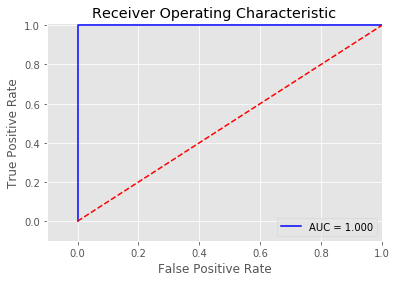

In [497]:
fpr, tpr, thresholds = roc_curve(Y_test, log.predict(X_test))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [498]:
dfs=pd.DataFrame()
print(df_smote.columns)
for col in df_smote.columns:
    print(col)
    col2=col
    col2=col2.replace('.','')
    dfs[col2]=df_smote[col]
    #print(col2,col)


Index(['account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.calls', 'total.eve.calls',
       'total.night.calls', 'total.intl.calls',
       'number.customer.service.calls', 'churn'],
      dtype='object')
account.length
international.plan
voice.mail.plan
number.vmail.messages
total.day.calls
total.eve.calls
total.night.calls
total.intl.calls
number.customer.service.calls
churn


In [500]:
glm = smf.logit(formula = "churn~accountlength+internationalplan+voicemailplan+numbervmailmessages+totaldaycalls+totalevecalls+totalnightcalls+totalnightcalls+numbercustomerservicecalls", data = dfs).fit()
y, X = dmatrices( "churn~accountlength+internationalplan+voicemailplan+numbervmailmessages+totaldaycalls+totalevecalls+totalnightcalls+totalnightcalls+numbercustomerservicecalls", data = dfs, return_type = "dataframe")

Optimization terminated successfully.
         Current function value: 0.599926
         Iterations 7


In [501]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3206
Model:                          Logit   Df Residuals:                     3197
Method:                           MLE   Df Model:                            8
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                  0.1345
Time:                        18:00:04   Log-Likelihood:                -1923.4
converged:                       True   LL-Null:                       -2222.2
                                        LLR p-value:                7.185e-124
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.1096      0.377     -0.291      0.771      -0.849       0.629
accountlength                 -0.0015      0.001     -1.432      0.152      -0.004       0.001
internationalplan              0.9432      0.138      6.833      0.000       0.673       1.214
voicemailplan                 -5.1154      0.375    -13.654      0.000      -5.850      -4.381
numbervmailmessages            0.1122      0.011     10.159      0.000       0.091       0.134
totaldaycalls                 -0.0007      0.002     -0.381      0.703      -0.005       0.003
totalevecalls                  0.0038      0.002      1.737      0.082      -0.000       0.008
totalnightcalls               -0.0039      0.002     -1.877      0.061      -0.008       0.000
numbercustomerservicecalls     0.2567      0.028      9.043      0.000       0.201       0.312
==============================================================================================
"""

In [502]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

v=[]
for i in range(len(vif)):
    v.append([vif[i],X.columns[i]])
print(v)

[[95.2494842450201, 'Intercept'], [1.0099719996078147, 'accountlength'], [1.011984371603908, 'internationalplan'], [4.775490258106253, 'voicemailplan'], [4.7811022719297185, 'numbervmailmessages'], [1.0038406296532394, 'totaldaycalls'], [1.0050557270433709, 'totalevecalls'], [1.0105261128826732, 'totalnightcalls'], [1.0342287767778262, 'numbercustomerservicecalls']]


Conclusion:totaldayminutes,totaldaycharge,totaleveminutes,totalevecharge,
    totalnightminutes,totalnightcharge,totalintlminutes,totalintlcharge

# Solutions to improve

 
        1.number.vmail.messages (bad) Not normally distributed
        2.totl.intl.calls(ok) Not normally distributed
        3.number.customer.service.calls(ok) Not normally distributed     
        4.total.night.charge~total.night.minutes highly correlated
        5.total.intl.charge~total.intl.minutes higlhy correlated
        6.voice.mail.plan~number.vmail.messages highly correlated
        7.totaldayminutes,totaldaycharge,totaleveminutes,totalevecharge,
    totalnightminutes,totalnightcharge,totalintlminutes,totalintlcharge have vif>10
        8.Do GridsearchCV 
        9.GD algo
 

In [503]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' :  [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [504]:
clf = GridSearchCV(log, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,Y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 710 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2772 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:  2.0min finished


In [505]:
best_clf.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

In [644]:
print (f'Accuracy - : {best_clf.score(x_train,y_train):.3f}')

Accuracy - : 0.710


In [508]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)
log = LogisticRegression(C=0.001,max_iter=100,penalty='none')
log.fit(X_train,Y_train)

LogisticRegression(C=0.001, penalty='none')

In [509]:
# slope
print("Slope:")
print(log.coef_)
# slope
print("Intercept:")
print(log.intercept_)

Slope:
[[ 2.55573747e-03  3.93523784e+00 -5.45165268e+00  1.15670830e-01
  -9.27989298e-03 -1.04696213e-01 -6.10698772e-02 -1.32194145e+00
  -1.14062069e+00  5.08298682e+01]]
Intercept:
[-0.25450708]


In [510]:
ysmot_pred=log.predict(X_test)
print("Predicted class:")
ysmot_pred

Predicted class:


array([0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0.

In [511]:
logit_score_train = log.score(X_train,Y_train)
print ('Model Score on Training data set', logit_score_train)
logit_score_test = log.score(X_test,Y_test)
print ('Model Score on Testing data set', logit_score_test)

logit_auc_train = roc_auc_score(Y_train,log.predict(X_train))
logit_auc_test = roc_auc_score(Y_test,log.predict(X_test))
print ('Auc on  Training data set',logit_auc_train)
print ('Auc on  Test data set', logit_auc_test)

Model Score on Training data set 1.0
Model Score on Testing data set 1.0
Auc on  Training data set 1.0
Auc on  Test data set 1.0


In [512]:
loss=log_loss(Y_test,log.predict_log_proba(X_test)[:,1])
print("Log loss:",loss)
print("Accuracy score:",accuracy_score(Y_test,log.predict_log_proba(X_test)[:,1].astype(int)))
confusion = confusion_matrix(Y_test,ysmot_pred)
print("Confusion matrix:")
print(confusion)

Log loss: 17.215589480329314
Accuracy score: 0.0
Confusion matrix:
[[322   0]
 [  0 320]]


In [513]:
Accuracy,Recall,Specificity,Precision=confusion__matrix(confusion_smote)
print("Accuracy:",Accuracy)
print("Recall:",Recall)
print("Specificity:",Specificity)
print("Precision:",Precision)

Accuracy: 1.0
Recall: 1.0
Specificity: 1.0
Precision: 1.0


In [514]:
print(classification_report(Y_test,log.predict(X_test)) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



In [515]:
AccuracyScore,RocAucCurve=kfoldcrossvalidation(log,X_resample,y_resample)
print("AccuracyScore:",AccuracyScore)
print("Std of AccuracyScore:",np.std(AccuracyScore))
print("Mean of AccuracyScore:",np.mean(AccuracyScore))
print("RocCurveScore:",RocAucCurve)
print("Std of RocAucCurve",np.std(RocAucCurve))
print("Mean of RocAucCurve",np.mean(RocAucCurve))

AccuracyScore: [1. 1. 1. 1. 1.]
Std of AccuracyScore: 0.0
Mean of AccuracyScore: 1.0
RocCurveScore: [1. 1. 1. 1. 1.]
Std of RocAucCurve 0.0
Mean of RocAucCurve 1.0


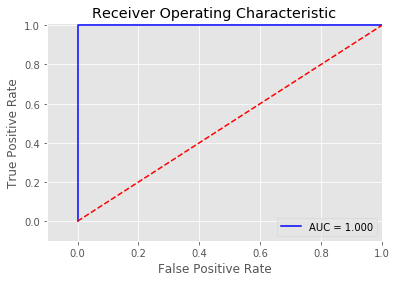

In [516]:
fpr, tpr, thresholds = roc_curve(Y_test, log.predict(X_test))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()